<a href="https://colab.research.google.com/github/khann160102/VietnamStreetFood/blob/main/VietnamStreet_Food_ViewerFeeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Data Import


Dataset: annotation-sheet.csv
*   [Dataset Github Link](https://github.com/khann160102/VietnamStreetFood/blob/main/annotation-sheet.csv)
*   [RAW Dataset Link](https://raw.githubusercontent.com/khann160102/VietnamStreetFood/main/annotation-sheet.csv)


1 - Data retrieve

In [1304]:
# Raw dataset link goes here
url = 'https://raw.githubusercontent.com/khann160102/VietnamStreetFood/main/annotation-sheet.csv'
df = pd.read_csv(url)

# Shuffle data (for fun, we'll shuffle the training set later anyway)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,no,video_index,student_id,student_name,video_id,standardized_dish,dish_occurence,dish_imply,duration,start_time,...,standardized_sauce,sauce,venue,container,recipes,viewer_feeling,food_feeling,youtuber_feeling,location,foreigner
0,1078,273,SE161800,Đoàn Huy,sftSsBiZvpA,Lotus seeds,hexane,hạt sen,11,02:41,...,NaN,NaN,casual,hands_on,0,3,2,1,Rạch Giá,0
1,2543,732,SE160932,Phan Huy Hoàng,UKegL2QY51k,Vietnamese fermented fish noodles soup,NaN,Bún mắm,168,05:00,...,NaN,NaN,casual,bowl,1,5,5,5,HCM,1
2,3704,1044,SE160366,Nguyễn Tấn Lộc,52alUCchcBw,Kebab rice noodles,bu cha,bun cha,14,00:26,...,fish sauce,NaN,fine,bowl,1,3,2,3,Ha Noi,1
3,3163,886,SE160793,Nguyễn Hữu Anh Tiến,FdaH5qD0emM,jellyfish soup,jellyfish soup,súp bơ,76,09:12,...,NaN,NaN,fine,hands_on,1,5,5,5,Nam Dinh,1
4,2211,620,SE150736,Nguyen Duy,TZXO7Zbw_O4,pho,pho,phở gà,23,04:35,...,chili sauce with spices,chili sauce with spices,casual,bowl,0,4,5,5,Ha Noi,1


2 - Data Description

In [1305]:
print('Dataframe info:')
df.info()
print('\n\n')
print('Dataframe description: ')
df.describe().transpose()

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   no                              3757 non-null   int64 
 1   video_index                     3757 non-null   int64 
 2   student_id                      2884 non-null   object
 3   student_name                    2884 non-null   object
 4   video_id                        3757 non-null   object
 5   standardized_dish               3757 non-null   object
 6   dish_occurence                  3313 non-null   object
 7   dish_imply                      3159 non-null   object
 8   duration                        3757 non-null   int64 
 9   start_time                      3757 non-null   object
 10  end_time                        3757 non-null   object
 11  standardized_ingredient         3119 non-null   object
 12  no_ingredient                   

,count,mean,std,min,25%,50%,75%,max
no,3757.0,1879.000000,1084.696809,1.0,940.0,1879.0,2818.0,3757.0
video_index,3757.0,515.537131,315.761411,1.0,234.0,527.0,786.0,1068.0
duration,3757.0,110.310088,921.869713,0.0,26.0,60.0,118.0,55958.0
no_ingredient,3757.0,3.284802,2.806564,0.0,1.0,3.0,5.0,20.0
recipes,3757.0,0.274421,0.446281,0.0,0.0,0.0,1.0,1.0
viewer_feeling,3757.0,3.740484,0.925898,1.0,3.0,4.0,4.0,5.0
food_feeling,3757.0,3.412563,1.172153,1.0,2.0,4.0,4.0,5.0
youtuber_feeling,3757.0,4.195369,0.860721,1.0,4.0,4.0,5.0,5.0
foreigner,3757.0,0.933191,0.249724,0.0,1.0,1.0,1.0,1.0


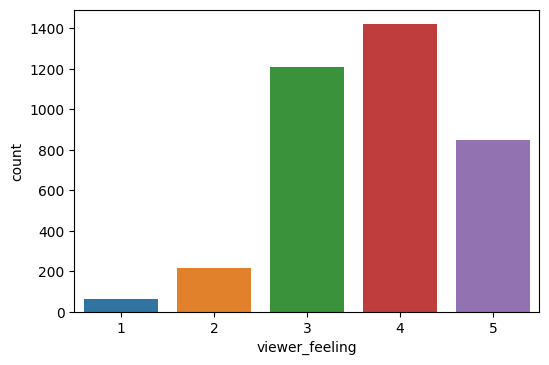

In [1306]:
plt.figure(dpi = 100)
ax = sns.countplot(data = df, x = 'viewer_feeling')
plt.show()

# Data Preprocessing

1.1 - One Hot Encoding (Columns = venue, container)

In [1307]:
label_df = pd.get_dummies(df[['venue', 'container']], prefix={'container', 'venue'})

1.2 - Data Scaling (Columns = duration, no_ingredient)

In [1308]:
df[["duration"]] = MinMaxScaler().fit_transform(df[["duration"]])
df[["no_ingredient"]] = MinMaxScaler().fit_transform(df[["no_ingredient"]])

2 - Define features (X) and data values (Y)

In [1309]:
input = np.array(df[['duration', 'no_ingredient', 'recipes']].join(label_df))
output = np.array(df[['viewer_feeling']])
#output = pd.get_dummies(df['viewer_feeling'], prefix='viewer_feeling')

input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2)

print(input.shape, output.shape)

(3757, 17) (3757, 1)


# Model Building

1.1 - Function definitions

In [1310]:
# SeLU Function
def selu(x):
  scale = float(1.0507009873554804934193349852946)
  alpha = float(1.6732632423543772848170429916717)
  return np.where(x > 0, scale * x, scale * alpha * (np.exp(x) - 1))

def selu_der(x):
  scale = float(1.0507009873554804934193349852946)
  alpha = float(1.6732632423543772848170429916717)
  return np.where(x > 0, scale, scale * alpha * np.exp(x))

# Mean Square Error Loss
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_der(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

# Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Accuracy Funciton
def accuracy(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return np.mean(np.array((y_true == y_pred)).astype(int),axis=0)

def bin_accuracy(y_true, y_pred):
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return np.mean(np.array((y_true == y_pred)).astype(int),axis=0)

2 - Build the model

In [1311]:
class Dense:
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        limit = np.sqrt(2 / float(input_size + output_size))
        
        self.weights = np.random.normal(0.0, limit, size=(input_size, output_size))
        self.bias = np.zeros((1, output_size))

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
       
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * np.sum(output_error,axis=0)
        return input_error

In [1312]:
class Activation:
    def __init__(self, activation, activation_der):
        self.activation = activation
        self.activation_der = activation_der

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_der(self.input) * output_error

In [1313]:
class Model:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_der = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_der, acc):
        self.loss = loss
        self.loss_der = loss_der
        self.acc = acc

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        
        # forward propagation
        output = input_data
        for layer in self.layers:
            output = layer.forward_propagation(output)
        return output

    # train the network
    def fit(self, x_train, y_train, x_test, y_test, epochs=10, batches=64, learning_rate=0.1, verbose=1):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            x = x_train.copy()
            y = y_train.copy()

            x, y = shuffle(x,y)

            err = 0
            acc = 0
            
            iterate = samples//batches + 1
            for j in range(iterate):
                # forward propagation
                output = x[j*batches:(j+1)*batches]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y[j*batches:(j+1)*batches], output)
                # calculate accuracy
                acc += self.acc(y[j*batches:(j+1)*batches], output)

                # backward propagation
                error = self.loss_der(y[j*batches:(j+1)*batches], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            err /= iterate
            acc /= iterate

            y_pred = self.predict(x_test)
            val_acc = self.acc(y_test,y_pred)
            if verbose == 1:
              print('epoch %d/%d   error=%f   acc=%f   val_acc=%f' % (i+1, epochs, err, acc, val_acc))

In [1314]:
def pred_stat(net):
  # generate predictions
  y_pred = net.predict(input_test)
  val_acc = net.acc(output_test,y_pred)

  print("accuracy: ", val_acc)
  tmp_array = np.array(np.argmax(y_pred,axis=1))
  unique, counts = np.unique(tmp_array, return_counts=True)
  print(np.asarray((unique, counts)).T)

  tmp_array = np.array(np.argmax(output_test,axis=1))
  unique, counts = np.unique(tmp_array, return_counts=True)
  print(np.asarray((unique, counts)).T)

In [1315]:
# network
model = Model()
model.add(Dense(17, 100))
model.add(Activation(sigmoid, sigmoid_der))
model.add(Dense(100, 200))
model.add(Activation(sigmoid, sigmoid_der))
model.add(Dense(200, 5))
model.add(Activation(sigmoid, sigmoid_der))

model.use(mse, mse_der, accuracy)

print("before training")
pred_stat(model)

# train
model.fit(input_train, output_train, input_test, output_test, epochs=200, batches=10 , learning_rate=0.001, verbose=1)

print("after training")
pred_stat(model)

before training
accuracy:  0.0
[[  3 752]]
[[  0 752]]
epoch 1/200   error=8.728511   acc=0.000000   val_acc=0.000000
epoch 2/200   error=8.426611   acc=0.018605   val_acc=0.090426
epoch 3/200   error=8.410226   acc=0.166445   val_acc=0.224734
epoch 4/200   error=8.397152   acc=0.243522   val_acc=0.272606
epoch 5/200   error=8.398346   acc=0.277741   val_acc=0.344415
epoch 6/200   error=8.397646   acc=0.351163   val_acc=0.433511
epoch 7/200   error=8.389719   acc=0.409302   val_acc=0.418883
epoch 8/200   error=8.385891   acc=0.424585   val_acc=0.461436
epoch 9/200   error=8.389993   acc=0.452492   val_acc=0.485372
epoch 10/200   error=8.397940   acc=0.476744   val_acc=0.515957
epoch 11/200   error=8.386082   acc=0.488372   val_acc=0.519947
epoch 12/200   error=8.388283   acc=0.505980   val_acc=0.543883
epoch 13/200   error=8.382251   acc=0.514950   val_acc=0.547872
epoch 14/200   error=8.382591   acc=0.520598   val_acc=0.550532
epoch 15/200   error=8.383974   acc=0.533887   val_acc=0.5